# Planning

### Project Overview

The goal of this project is to build a Linear Regression model to predict medical aid charges for clients, based on lifestyle and demographic features such as age, sex, BMI, smoking habits, number of children, and geographical region.

The dataset we’ll use is based on medical charges in the United States, but we are using it as a proof-of-concept for a South African medical aid provider. The model will help assess whether dynamic pricing based on client characteristics can be feasibly implemented.

### What Is Linear Regression?

According to Geeksforgeeks.org (2020), Linear regression is a supervised machine learning algorithm which uses labelled datasets to learn and create the best-fitting linear function for mapping data points. This function can then be used to make predictions on new data. The algorithm identifies the linear relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. Its primary goal is to predict continuous output values based on the input features. The image below depicts the equation of linear regression. It shows the dependent variable, intercept, coefficeint and independent variable. Note that this equation only shows 1 independent variable with its coefficient as it is meant for a simple linear regression model. The dataset that we are working with is a multiple linear regression model as it contains more than 1 independent variable.

![alt text](1_PDbfu8RCLs8RisqKHyNiJA.png)

This image was taken from (Meesala, 2023)


This image shows the difference in the equations between simple, multiple and polynomial models.


![alt text](0_z34vg1BomgkHpGUF.png)


This image was taken from (Tavishi, 2023)

### Dataset Justification

The dataset used in this project, sourced from Kaggle (https://www.kaggle.com/datasets/mirichoi0218/insurance), is highly suitable for building a proof-of-concept linear regression model for predicting medical aid costs. Although the data is US-based, it contains relevant features such as age, sex, body mass index (BMI), number of children, smoking status, and geographic region—all of which are equally significant in the South African healthcare context. These variables influence healthcare costs universally and offer valuable insight into how different lifestyle and demographic factors correlate with insurance charges. The dataset is relatively clean, well-structured, and contains no missing values, making it ideal for initial modeling without requiring extensive preprocessing. Additionally, the target variable (charges) is continuous, aligning perfectly with the assumptions and requirements of linear regression. As a result, this dataset allows us to effectively explore relationships between variables and demonstrate how a sliding-scale pricing model could function, which supports the medical aid provider’s goal of tailoring premiums to client profiles. Once validated, the same methodology can later be applied to locally sourced data for real-world deployment.

### Exploratory Data Analysis (EDA) - Plan

EDA is the process of using visually and statistically understanding data and summarizing their main characteristics. 

#### Step by Step Plan

1. Load the data
    
    - In this step we load the dataset in via pandas so that it can be analyzed and manipulated easily.
    
    - The code we use is: df = pd.read_csv("csvfilename.csv")

2. Initial inspection of data and check for outliers
    - In this step we get more insight with regards to the data.

    - The code we use are:
        - df.head() shows a snapshot of the data for basic familiarization.
        
        - df.info() helps check the data types and identify categorical vs numerical features.

        - df.describe() provides summary statistics such as mean, min, max, standard deviation, helping identify skewness, outliers, and range of features.

3. Check for missing values
    - In this step we check if there are any missing values to ensure data quality as missing values can bias a model.

    - The code we use is: df.isnull().sum()

4. Visualize numeric and categorical fields
    - In this step we visualize the data in the form of graphs to help reveal data distributions, medians and outliers.
    
    - Here we are going to use a boxplot and a histplot
    
    - The code we are going to use are: 

        - sns.histplot(df['column name'], kde=True)

        - sns.boxplot(x='independent variable', y='dependent variable', data=df)

5. Check the correlation between the data 
    - Here we will check to see the relationship between the numeric features

    - We will convert all categorical values into binary numbers so that they can be included in the correlation check using OneHotEncoder.

    - The code we will use to check the correlation is:
           
        - sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Feature Selection

Based on the analysis done above we will determine what features we would like to use. Since this is a small dataset and each feature looks to have a logical impact on the medical charges we most probably will use all the features.

### Model Training Plan

#### Split the data into training and testing sets

Once we have separated the features and the target value, we will then split the data into test and training data. We will use the value of 80% for training and 20% for testing.

- The code we are going to use is:

    - X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Create and Train the model

After spliting the data, we will then create and train the model.

We are using the LinearRegression class from scikit-learn, which fits a linear model using least squares. This step learns the optimal coefficients (β values) that minimize the prediction error (difference between predicted and actual charges). 

- The code we are going to use is:
    - model = LinearRegression()
      
    - model.fit(X_train, y_train)

### Model Evaluation

#### Make predictions

We will first make the predictions using the model.

- The code we will use is:
    - y_pred = model.predict(X_test)


#### Evaluate the model performance with metrics

Once the predictions are made we will then evaluate them against performance metrics.

The performance metrics we are going to use are:

- R² Score: as it will show how well the model explains the variance in the target variable. A score closer to 1 means that the model predicted well whereas a score closer to 0 means that it performed poorly.

- Mean Absolute Error (MAE): as this tells us how much the model's predictions are off on average. A smaller value would be considered as good but it is important to note that this value is compared to the scale of the target variable.

- Mean Squared Error (MSE): as it calculates the average of the squared differences between actual and predicted values. It gives higher weight to larger errors, which means it penalizes bigger mistakes more severely than MAE. A lower MSE indicates better model performance, but like MAE, it must be interpreted in the context of the scale of the target variable.

#### Visualize Actual vs Predicted values

To further evaluate our model we will compare the predicted vs actual values using a scatter plot graph. A good model will have the scatter dots close to the diagonal line. This will confirm whether the predicted charges are close to the actual chareges and whether there is a consisten undre or over estimation.

### Report Planning

#### PDF Report

The final report will summarize the full analysis pipeline, and include visuals, code summaries, and interpretation of results. It will be structured clearly to communicate the work to both technical and non-technical stakeholders.

#### Report Structure

1. Introduction

    - Problem statement

    - Purpose of the model

    - Brief overview of the dataset

2. Dataset Overview

    - Source of the data

    - Explanation of the features

    - Target Variable

3. EDA Findings

    - Summary of trends from plots

    - Any outliers or skewness

    - Any insights

4. Data Preprocessing and Model Training

    - One-hot encoding

    - Feature-target split

    - Train-test split
    
    - Description of linear regression

5. Model Evaluation

    - MAE, MSE, R² scores

    - Visual plots: actual vs predicted

6. Conclusion

    - Summary of findings

    - Discussion of model limitations

    - Potential improvements and next steps

# Code Analysis

Importing Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder


Importing Dataset

In [36]:
df = pd.read_csv("insurance.csv")

Looking at the first 5 records in the dataset

In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Checking dataset structure

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Summary statistics

In [39]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Check if any null values in the dataset

In [40]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Visualize distributions of numeric variables

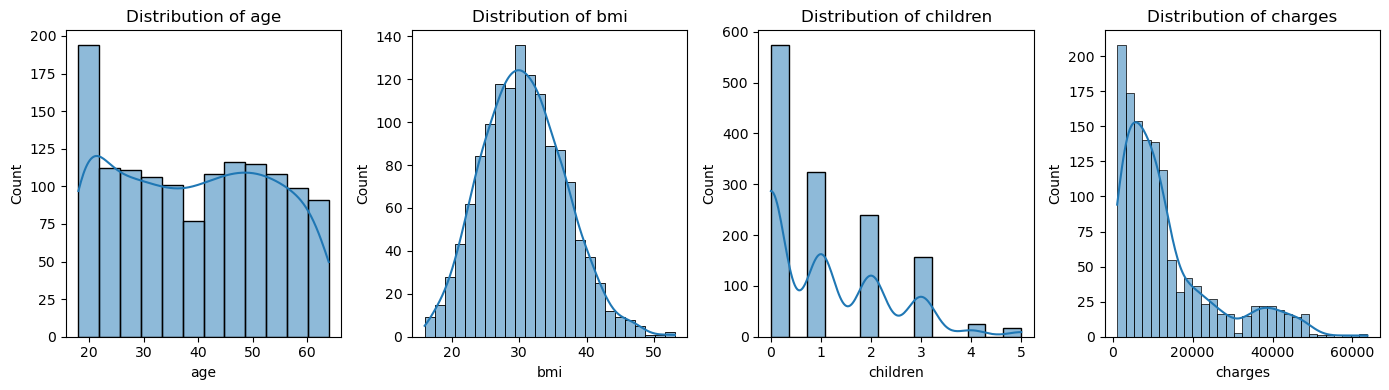

In [41]:
plt.figure(figsize=(14, 4))
for i, col in enumerate(['age', 'bmi', 'children', 'charges']):
    plt.subplot(1, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


Boxplots for charges against categorical variables

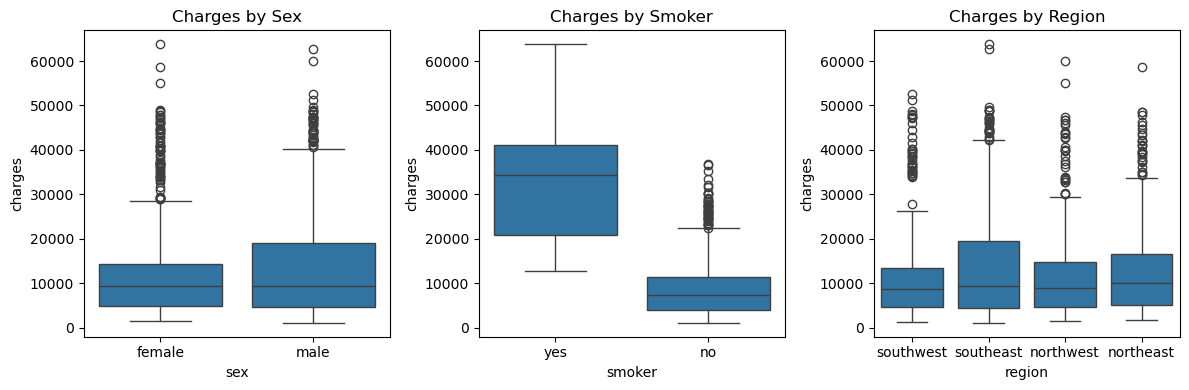

In [42]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x='sex', y='charges', data=df)
plt.title("Charges by Sex")

plt.subplot(1, 3, 2)
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges by Smoker")

plt.subplot(1, 3, 3)
sns.boxplot(x='region', y='charges', data=df)
plt.title("Charges by Region")

plt.tight_layout()
plt.show()


Correlation heatmap 

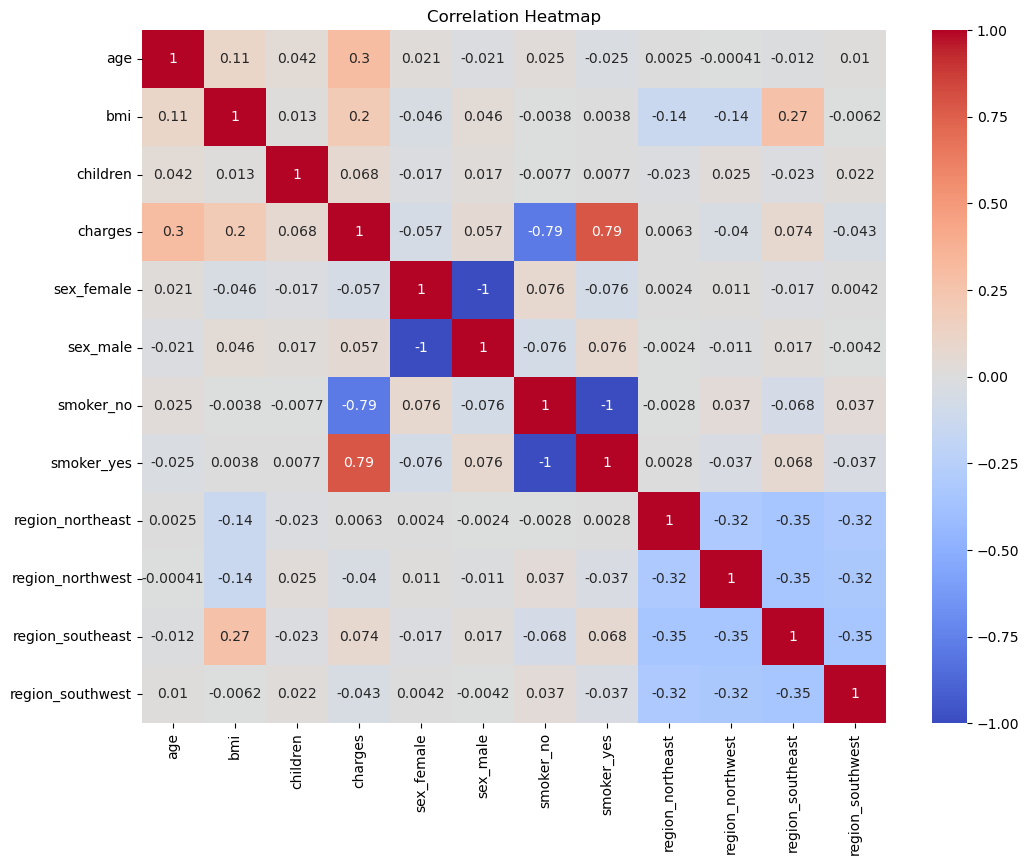

In [43]:

#Code attribution
#author
#title
#available at: https://www.youtube.com/watch?v=rsyrZnZ8J2o  https://www.youtube.com/watch?v=x_GZgeLJU4g

# Select categorical columns
cat_cols = df.select_dtypes('object').columns.tolist()

# Initialize and fit the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(df[cat_cols])

# Transform categorical variables
encoded_cols = encoder.get_feature_names_out(cat_cols)
df[encoded_cols] = encoder.transform(df[cat_cols])

# Drop original categorical columns
df.drop(columns=cat_cols, inplace=True)

plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Defining features and target values and training the model

In [44]:
X = df.drop('charges', axis=1)
y = df['charges']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Make predictions

In [45]:
y_pred = model.predict(X_test)

Evaluating the model

In [46]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) 

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R² Score: 0.7836
Mean Absolute Error: 4181.19
Mean Squared Error: 33596915.85


Actual vs Predicted Plot using seaborn and matplotlib

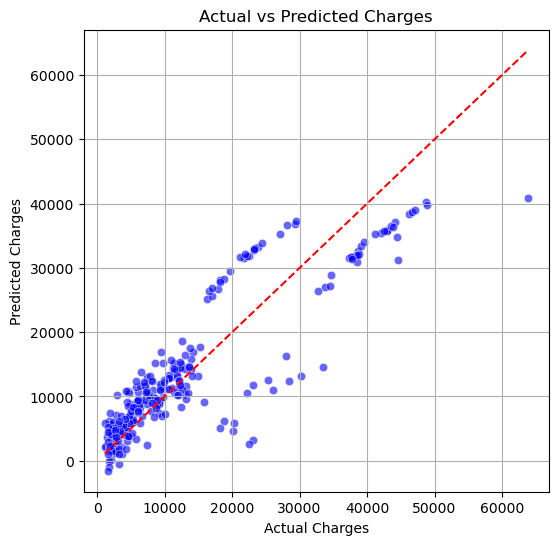

In [47]:
#Code Attribution
#Author: Léonard
#Title: How to show min and max values at the end of the axes
#Available at: https://stackoverflow.com/questions/64321561/how-to-show-min-and-max-values-at-the-end-of-the-axes
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.grid(True)
plt.show()


## Reference List


Geeksforgeeks.org. (2025). ML | Linear Regression - GeeksforGeeks. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/ml-linear-regression/.

Léonard. (2020). How to show min and max values at the end of the axes. [online] Stack Overflow. Available at: https://stackoverflow.com/questions/64321561/how-to-show-min-and-max-values-at-the-end-of-the-axes.

Meesala, P., 2023. A Brief Overview of Simple Linear Regression and its Implementation in Python. [online] Medium. Available at: https://prasad07143.medium.com/a-brief-overview-of-simple-linear-regression-and-its-implementation-in-python-e6b5c180ff08 [Accessed 21 Apr. 2025].

Tavishi, 2023. Linear Regression in ML. [online] Medium. Available at: https://medium.com/@tavishi.1402/linear-regression-in-ml-56107a59be03 [Accessed 21 Apr. 2025].
‌